In [58]:
import numpy as np
from functools import cache
import matplotlib.pyplot as plt
from typing import Optional
from scipy.signal import lfilter

# 3.11 - 1

<StemContainer object of 3 artists>

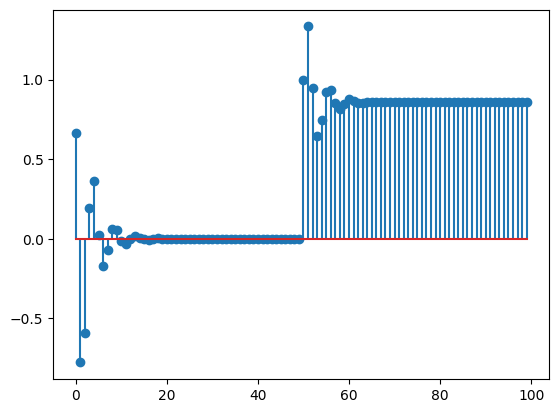

In [59]:
@cache
def y_n(n: int) -> int:
    if n in [-1, -2]:
        return 2
    x = 1 if n == 0 or n >= 50 else 0
    return x + y_n(n - 1) / 3 - y_n(n - 2) / 2


vec_y = np.vectorize(y_n, otypes=[float])
n = np.arange(100)
y = vec_y(n)
plt.stem(y)

# 3.11 - 2

<StemContainer object of 3 artists>

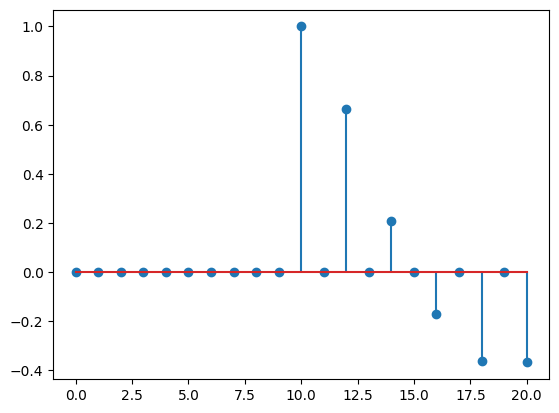

In [60]:
def f_2(n: float) -> float:
    if not n.is_integer():
        return 0
    if n < 0:
        return 0
    return np.exp(-n / 5) * np.cos(np.pi * n / 5)


vec_f2 = np.vectorize(f_2, otypes=[float])
n = np.arange(-10.0, 11.0)
y = vec_f2(n / 2)
plt.stem(y)

# 3.11 - 3

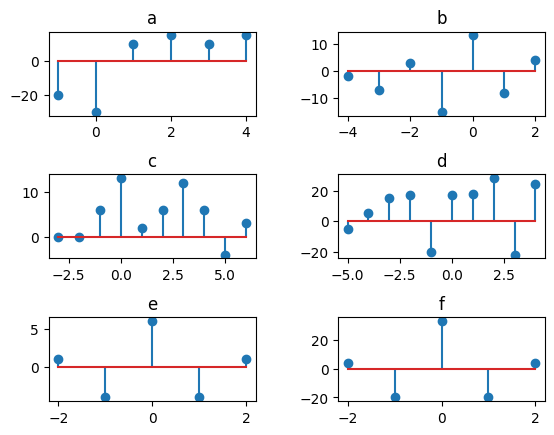

In [61]:
def convolve_with_offset(a: np.array, b: np.array, offset_a, offset_b) -> (np.array, int):
    c = np.convolve(a, b)
    offset_total = offset_a + offset_b
    return c, offset_total


def plot_with_offset(axs: plt.Axes, c: np.array, o: float, title: Optional[str] = None):
    x = np.arange(len(c)) - o
    axs.stem(x, c)
    if title is not None:
        axs.set_title(title)


_, axs = plt.subplots(3, 2)
c, o = convolve_with_offset([2, 3, -2, -3], [-10, 0, -5], 0, 1)
plot_with_offset(axs[0, 0], c, o, "a")
c, o = convolve_with_offset([2, -1, 3, -2], [-1, -4, 1, -2], 1, 3)
plot_with_offset(axs[0, 1], c, o, "b")
c, o = convolve_with_offset([0, 0, 3, 2, 1, 2, 3], [2, 3, -2, 1], 0, 3)
plot_with_offset(axs[1, 0], c, o, "c")
c, o = convolve_with_offset([5, 0, 0, -2, 8], [-1, 1, 3, 3, -2, 3], 3, 2)
plot_with_offset(axs[1, 1], c, o, "d")
c1, o1 = convolve_with_offset([1, -1], [1, -1], 1, 0)
c2, o2 = convolve_with_offset([1, -1], [1, -1], 0, 1)
c3, o3 = convolve_with_offset(c1, c2, o1, o2)
plot_with_offset(axs[2, 0], c3, o3, "e")
c1, o1 = convolve_with_offset([2, -1], [1, -2], 1, 0)
c2, o2 = convolve_with_offset([1, -2], [2, -1], 0, 1)
c3, o3 = convolve_with_offset(c1, c2, o1, o2)
plot_with_offset(axs[2, 1], c3, o3, "f")
plt.subplots_adjust(wspace=0.4, hspace=0.7)



# 3.11 - 4

<StemContainer object of 3 artists>

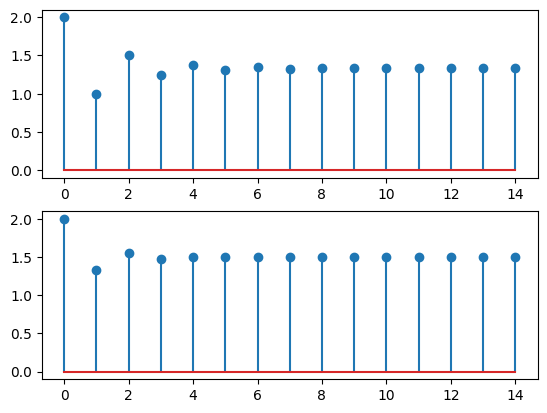

In [62]:
@cache
def distance(n: int, c: float):
    if n == 0:
        return 2
    return distance(n - 1, c) + 2 * c ** n


_, axs = plt.subplots(2, 1)
dist_vec = np.vectorize(distance, otypes=[float])
axs[0].stem(dist_vec(np.arange(15), -1.0 / 2))
axs[1].stem(dist_vec(np.arange(15), -1.0 / 3))


# 3.11 - 5

<StemContainer object of 3 artists>

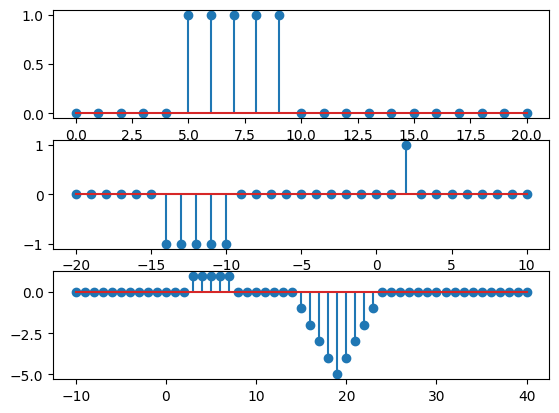

In [63]:
def xcorr(x: np.ndarray, y: np.ndarray, nx: np.ndarray, ny: np.ndarray):
    rxy = np.convolve(x, np.flip(y))
    nrx = np.arange(nx[0] - ny[-1], nx[-1] - ny[0] + 1)
    return rxy, nrx


_, axs = plt.subplots(3, 1)
x = np.zeros(21)
nx = np.arange(20 + 1)
x[5:10] = 1
y = np.zeros(31)
ny = np.arange(-20, 10 + 1)
y[6:11] = -1
y[22] = 1
axs[0].stem(nx, x)
axs[1].stem(ny, y)

r, n = xcorr(x, y, nx, ny)
axs[2].stem(n, r)


# 3.11 - 6

In [64]:
def Ex(x: np.ndarray):
    return np.sum(np.abs(x))


def Px(x: np.ndarray):
    return np.sum(np.abs(x)) / len(x)

# 3.11 - 7

<StemContainer object of 3 artists>

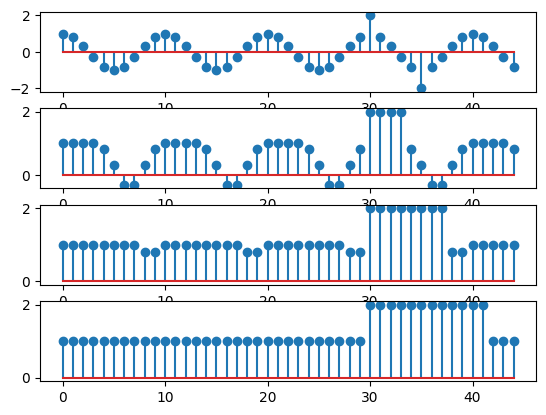

In [65]:
def n_max_filter(x: np.ndarray, N: int):
    y = np.zeros(len(x))
    for i in range(len(x)):
        start = max(0, i - (N - 1))
        y[i] = np.amax(x[start: i + 1])
    return y

x = np.cos(np.arange(45)*np.pi/5)
x[30] += 1
x[35] -= 1

_, axs = plt.subplots(4, 1)
axs[0].stem(x)
axs[1].stem(n_max_filter(x, 4))
axs[2].stem(n_max_filter(x, 8))
axs[3].stem(n_max_filter(x, 12))


# 3.11 - 8

<StemContainer object of 3 artists>

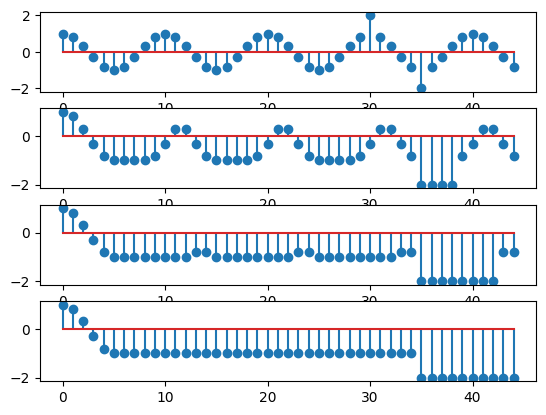

In [66]:
def n_min_filter(x: np.ndarray, N: int):
    y = np.zeros(len(x))
    for i in range(len(x)):
        start = max(0, i - (N - 1))
        y[i] = np.amin(x[start: i + 1])
    return y

x = np.cos(np.arange(45)*np.pi/5)
x[30] += 1
x[35] -= 1

_, axs = plt.subplots(4, 1)
axs[0].stem(x)
axs[1].stem(n_min_filter(x, 4))
axs[2].stem(n_min_filter(x, 8))
axs[3].stem(n_min_filter(x, 12))


# 3.11 - 9

<StemContainer object of 3 artists>

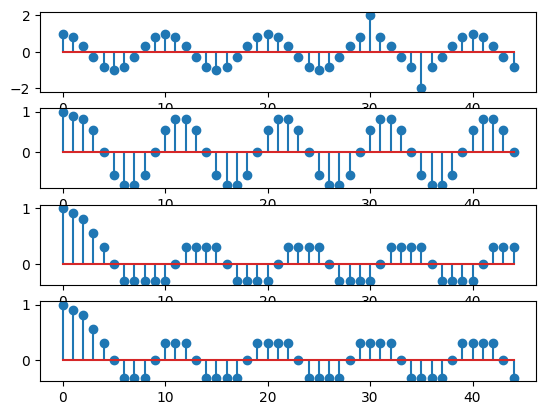

In [67]:
def n_median_filter(x: np.ndarray, N: int):
    y = np.zeros(len(x))
    for i in range(len(x)):
        start = max(0, i - (N - 1))
        y[i] = np.median(x[start: i + 1])
    return y

x = np.cos(np.arange(45)*np.pi/5)
x[30] += 1
x[35] -= 1

_, axs = plt.subplots(4, 1)
axs[0].stem(x)
axs[1].stem(n_median_filter(x, 4))
axs[2].stem(n_median_filter(x, 8))
axs[3].stem(n_median_filter(x, 12))


# 3.11 - 10

<StemContainer object of 3 artists>

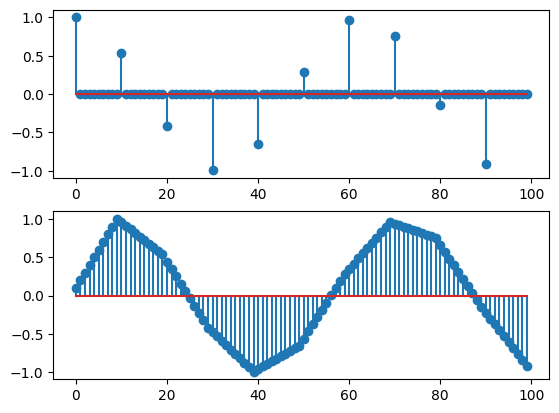

In [68]:
a = 1
b = np.convolve(np.ones(10), np.ones(10)) / 10

x = np.zeros(100)
for i in range(10):
    x[i * 10] = np.cos(i)

y = lfilter(b, a, x)
_, axs = plt.subplots(2, 1)

axs[0].stem(x)
axs[1].stem(y)

# 3.11 - 11

<StemContainer object of 3 artists>

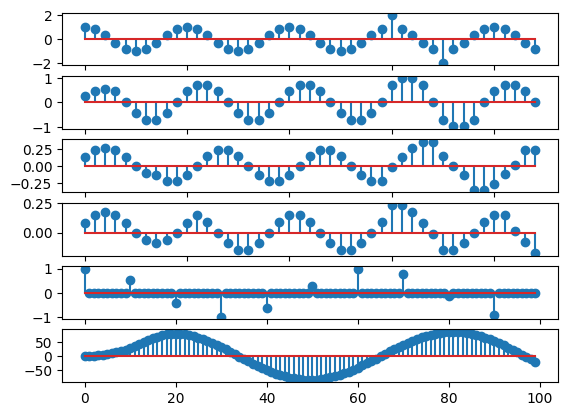

In [69]:
def mov_avg_filt(x: np.ndarray, N: int):
    a = 1
    b = np.ones(N) / N
    return lfilter(b, a, x)

x = np.cos(np.arange(45)*np.pi/5)
x[30] += 1
x[35] -= 1

_, axs = plt.subplots(6, 1)

axs[0].stem(x)
axs[1].stem(mov_avg_filt(x, 4))
axs[2].stem(mov_avg_filt(x, 8))
axs[3].stem(mov_avg_filt(x, 12))


a = 1
b = np.convolve(np.ones(10), np.ones(10)) / 10

x = np.zeros(100)
for i in range(10):
    x[i * 10] = np.cos(i)

y = 10 * lfilter(b, a, lfilter(b, a, x))

axs[4].stem(x)
axs[5].stem(y)
